In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import geopandas as gpd

In [3]:
df_barris = pd.read_csv('data/HABITATGE_LLOGUER_BARRIS_25.csv', delimiter=';')
df_barris

,ID,BARRI,BARRI_BCN,CONTRAC,CONT1000H,VARCONTR,TRAMLLOG,LLOGUER,VARLLOG,LLOGTRIM,SUPMITJ,PREUM2,PREUM2TRIM,GEOMETRIA
0,1,1,el Raval,555,21.983315,-9.016393,> 850 i <= 1000 euros/mes,944.205604,-4.555778,969.902984,60.693694,16.335153,16.626306,MULTIPOLYGON (((430607.335454264 4581881.57694...
1,2,2,el Barri Gòtic,269,19.092396,7.171315,> 1000 euros/mes,1205.260818,-1.030824,1276.712366,85.072727,16.485631,16.341041,MULTIPOLYGON (((431641.334436453 4581405.51038...
2,3,3,la Barceloneta,209,21.227406,88.288288,> 850 i <= 1000 euros/mes,902.107273,-14.397992,956.745773,45.227273,22.322604,22.387558,MULTIPOLYGON (((433088.289657605 4581798.87002...
3,17,17,Sants - Badal,251,19.207092,-5.283019,> 850 i <= 1000 euros/mes,926.416375,-4.633878,915.222826,58.722222,16.029918,16.406279,MULTIPOLYGON (((427385.147094413 4580381.23113...
4,18,18,Sants,445,19.861598,-8.811475,> 850 i <= 1000 euros/mes,982.919348,-4.791220,1003.903860,64.510204,15.865071,16.106829,MULTIPOLYGON (((428338.31375162 4581328.092342...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,68,68,el Poblenou,286,15.372903,-12.804878,> 1000 euros/mes,1165.961748,-7.392132,1192.638156,66.317829,18.165205,18.296693,MULTIPOLYGON (((434080.370452822 4582886.99018...
69,69,69,Diagonal Mar i el Front Marítim del Poblenou,100,15.015238,-29.078014,> 1000 euros/mes,1725.708800,32.843503,1817.318654,87.461538,21.815672,22.894746,MULTIPOLYGON (((434942.39399708 4583968.355315...
70,70,70,el Besòs i el Maresme,153,9.536785,56.122449,<= 750 euros/mes,717.511895,-18.806616,722.026400,60.978261,12.878175,12.380359,MULTIPOLYGON (((434942.39399708 4583968.355315...
71,71,71,Provençals del Poblenou,191,14.713487,13.690476,> 1000 euros/mes,1061.899267,-6.878598,1145.021333,73.870370,16.475348,15.938421,MULTIPOLYGON (((434130.822881437 4584774.14668...


In [4]:
df_barris.head()

,ID,BARRI,BARRI_BCN,CONTRAC,CONT1000H,VARCONTR,TRAMLLOG,LLOGUER,VARLLOG,LLOGTRIM,SUPMITJ,PREUM2,PREUM2TRIM,GEOMETRIA
0,1,1,el Raval,555,21.983315,-9.016393,> 850 i <= 1000 euros/mes,944.205604,-4.555778,969.902984,60.693694,16.335153,16.626306,MULTIPOLYGON (((430607.335454264 4581881.57694...
1,2,2,el Barri Gòtic,269,19.092396,7.171315,> 1000 euros/mes,1205.260818,-1.030824,1276.712366,85.072727,16.485631,16.341041,MULTIPOLYGON (((431641.334436453 4581405.51038...
2,3,3,la Barceloneta,209,21.227406,88.288288,> 850 i <= 1000 euros/mes,902.107273,-14.397992,956.745773,45.227273,22.322604,22.387558,MULTIPOLYGON (((433088.289657605 4581798.87002...
3,17,17,Sants - Badal,251,19.207092,-5.283019,> 850 i <= 1000 euros/mes,926.416375,-4.633878,915.222826,58.722222,16.029918,16.406279,MULTIPOLYGON (((427385.147094413 4580381.23113...
4,18,18,Sants,445,19.861598,-8.811475,> 850 i <= 1000 euros/mes,982.919348,-4.791220,1003.903860,64.510204,15.865071,16.106829,MULTIPOLYGON (((428338.31375162 4581328.092342...


In [5]:


df_district_barri = pd.DataFrame([
    # CIUTAT VELLA
    ("CIUTAT VELLA", "el Raval  "),
    ("CIUTAT VELLA", "el Barri Gòtic  "),
    ("CIUTAT VELLA", "la Barceloneta  "),
    ("CIUTAT VELLA", "Sant Pere, Santa Caterina i la Ribera  "),

    # EIXAMPLE
    ("EIXAMPLE", "el Fort Pienc  "),
    ("EIXAMPLE", "la Sagrada Família  "),
    ("EIXAMPLE", "la Dreta de l'Eixample  "),
    ("EIXAMPLE", "l'Antiga Esquerra de l'Eixample  "),
    ("EIXAMPLE", "la Nova Esquerra de l'Eixample  "),
    ("EIXAMPLE", "Sant Antoni  "),

    # SANTS - MONTJUÏC
    ("SANTS - MONTJUÏC", "el Poble Sec"),
    ("SANTS - MONTJUÏC", "la Marina del Prat Vermell"),
    ("SANTS - MONTJUÏC", "la Marina de Port  "),
    ("SANTS - MONTJUÏC", "la Font de la Guatlla  "),
    ("SANTS - MONTJUÏC", "Hostafrancs  "),
    ("SANTS - MONTJUÏC", "la Bordeta  "),
    ("SANTS - MONTJUÏC", "Sants  "),
    ("SANTS - MONTJUÏC", "Sants - Badal  "),

    # LES CORTS
    ("LES CORTS", "les Corts  "),
    ("LES CORTS", "la Maternitat i Sant Ramon  "),
    ("LES CORTS", "Pedralbes  "),

    # SARRIÀ - SANT GERVASI
    ("SARRIÀ - SANT GERVASI", "Sarrià  "),
    ("SARRIÀ - SANT GERVASI", "les Tres Torres  "),
    ("SARRIÀ - SANT GERVASI", "Sant Gervasi - la Bonanova  "),
    ("SARRIÀ - SANT GERVASI", "Sant Gervasi - Galvany  "),
    ("SARRIÀ - SANT GERVASI", "el Putxet i el Farró  "),
    ("SARRIÀ - SANT GERVASI", "Vallvidrera, el Tibidabo i les Planes  "),

    # GRÀCIA
    ("GRÀCIA", "la Salut  "),
    ("GRÀCIA", "la Vila de Gràcia  "),
    ("GRÀCIA", "el Camp d'en Grassot i Gràcia Nova  "),
    ("GRÀCIA", "el Coll  "),
    ("GRÀCIA", "Vallcarca i els Penitents  "),

    # HORTA - GUINARDÓ
    ("HORTA - GUINARDÓ", "el Baix Guinardó  "),
    ("HORTA - GUINARDÓ", "Can Baró  "),
    ("HORTA - GUINARDÓ", "el Guinardó  "),
    ("HORTA - GUINARDÓ", "la Font d'en Fargues  "),
    ("HORTA - GUINARDÓ", "el Carmel  "),
    ("HORTA - GUINARDÓ", "la Teixonera  "),
    ("HORTA - GUINARDÓ", "Sant Genís dels Agudells  "),
    ("HORTA - GUINARDÓ", "Montbau  "),
    ("HORTA - GUINARDÓ", "la Vall d'Hebron  "),
    ("HORTA - GUINARDÓ", "la Clota  "),
    ("HORTA - GUINARDÓ", "Horta  "),

    # NOU BARRIS
    ("NOU BARRIS", "Vilapicina i la Torre Llobeta  "),
    ("NOU BARRIS", "la Guineueta  "),
    ("NOU BARRIS", "les Roquetes  "),
    ("NOU BARRIS", "Porta  "),
    ("NOU BARRIS", "el Turó de la Peira  "),
    ("NOU BARRIS", "Can Peguera  "),
    ("NOU BARRIS", "Canyelles  "),
    ("NOU BARRIS", "Verdun  "),
    ("NOU BARRIS", "la Prosperitat  "),
    ("NOU BARRIS", "la Trinitat Nova  "),
    ("NOU BARRIS", "Torre Baró  "),
    ("NOU BARRIS", "Ciutat Meridiana  "),
    ("NOU BARRIS", "Vallbona  "),

    # SANT ANDREU
    ("SANT ANDREU", "la Trinitat Vella  "),
    ("SANT ANDREU", "Baró de Viver  "),
    ("SANT ANDREU", "el Bon Pastor  "),
    ("SANT ANDREU", "Sant Andreu  "),
    ("SANT ANDREU", "la Sagrera  "),
    ("SANT ANDREU", "el Congrés i els Indians  "),
    ("SANT ANDREU", "Navas  "),

    # SANT MARTÍ
    ("SANT MARTÍ", "el Camp de l'Arpa del Clot  "),
    ("SANT MARTÍ", "el Clot  "),
    ("SANT MARTÍ", "el Parc i la Llacuna del Poblenou  "),
    ("SANT MARTÍ", "la Vila Olímpica del Poblenou  "),
    ("SANT MARTÍ", "el Poblenou  "),
    ("SANT MARTÍ", "Diagonal Mar i el Front Marítim del Poblenou  "),
    ("SANT MARTÍ", "el Besòs i el Maresme  "),
    ("SANT MARTÍ", "Provençals del Poblenou  "),
    ("SANT MARTÍ", "Sant Martí de Provençals  "),
    ("SANT MARTÍ", "la Verneda i la Pau  "),
], columns=["Districte", "BARRI_BCN"])

# Normalizar espacios en los nombres de barrios
df_barris["BARRI_BCN"] = df_barris["BARRI_BCN"].str.strip()
df_district_barri["BARRI_BCN"] = df_district_barri["BARRI_BCN"].str.strip()


df_district_barri


,Districte,BARRI_BCN
0,CIUTAT VELLA,el Raval
1,CIUTAT VELLA,el Barri Gòtic
2,CIUTAT VELLA,la Barceloneta
3,CIUTAT VELLA,"Sant Pere, Santa Caterina i la Ribera"
4,EIXAMPLE,el Fort Pienc
...,...,...
68,SANT MARTÍ,Diagonal Mar i el Front Marítim del Poblenou
69,SANT MARTÍ,el Besòs i el Maresme
70,SANT MARTÍ,Provençals del Poblenou
71,SANT MARTÍ,Sant Martí de Provençals


In [84]:
df_data = pd.read_csv('data/data_aprobados_colegio_barrio_2022.csv', delimiter=';', encoding='latin1')

df_bcn = df_data[df_data['Municipi'] == 'BARCELONA']

df_bcn_filtered=df_bcn[["Codi districte","Naturalesa","Concert","Resultat de l'avaluació", 'Alumnes avaluats']].copy()

df_bcn_filtered['Codi districte']=df_bcn_filtered['Codi districte']-801900

df_resultados_distrito = df_bcn_filtered.groupby(
        ["Codi districte", "Naturalesa", "Resultat de l'avaluació"]
    )["Alumnes avaluats"].sum().reset_index()

df_resultados_distrito["porcentaje"] = (
    df_resultados_distrito["Alumnes avaluats"] /
    df_resultados_distrito.groupby(["Codi districte", "Naturalesa"])["Alumnes avaluats"].transform("sum")
    * 100
)


df_resultados_distrito.head()






,Codi districte,Naturalesa,Resultat de l'avaluació,Alumnes avaluats,porcentaje
0,1,PRIVAT,NO PROMOCIONEN,71,7.593583
1,1,PRIVAT,PROMOCIONEN AMB PENDENTS,162,17.326203
2,1,PRIVAT,PROMOCIONEN SENSE PENDENTS,702,75.080214
3,1,PÚBLIC,NO PROMOCIONEN,80,6.015038
4,1,PÚBLIC,PROMOCIONEN AMB PENDENTS,467,35.112782


In [92]:
df_bcn[df_bcn["Naturalesa"]=="PÚBLIC"]["Concert"].unique()

array([nan], dtype=object)

In [7]:
 
df_bcn_disctricts=gpd.read_file('barcelona_districts_clean.geojson')

df_bcn_disctricts.head()

,Codi_Districte,nom_districte,geometria_etrs89,geometria_wgs84,geometry
0,1,Ciutat Vella,"POLYGON ((431733.736 4582441.816, 431557.5115 ...","POLYGON ((2.18345134701381 41.3906119681235, 2...","POLYGON ((2.18345 41.39061, 2.18132 41.39222, ..."
1,2,Eixample,"POLYGON ((432033.1836 4583665.0318, 431837.083...","POLYGON ((2.18689546486771 41.4016544763739, 2...","POLYGON ((2.1869 41.40165, 2.18453 41.40345, 2..."
2,3,Sants-Montjuïc,"MULTIPOLYGON (((431001.6 4577921.76, 430999.65...",MULTIPOLYGON (((2.17520933722813 41.3498386054...,"MULTIPOLYGON (((2.17521 41.34984, 2.17519 41.3..."
3,4,Les Corts,"POLYGON ((425054.6701 4583672.5601, 425047.220...","POLYGON ((2.10341813050026 41.4011020711442, 2...","POLYGON ((2.10342 41.4011, 2.10333 41.40111, 2..."
4,5,Sarrià-Sant Gervasi,"MULTIPOLYGON (((421380.6 4587521.9, 421367.7 4...",MULTIPOLYGON (((2.05896991836021 41.4354197742...,"MULTIPOLYGON (((2.05897 41.43542, 2.05881 41.4..."


In [95]:
df_resultados_distrito


# Método más directo sin función personalizada
resultados = df_resultados_distrito.groupby(['Codi districte', 'Naturalesa']).apply(
    lambda x: pd.Series({
        'Indice': (
            x[x['Resultat de l\'avaluació'] == 'PROMOCIONEN SENSE PENDENTS']['Alumnes avaluats'].sum() * 1 +
            x[x['Resultat de l\'avaluació'] == 'PROMOCIONEN AMB PENDENTS']['Alumnes avaluats'].sum() * 0.5
        ) / x['Alumnes avaluats'].sum() if x['Alumnes avaluats'].sum() > 0 else 0,
        'Total_Alumnes': x['Alumnes avaluats'].sum()
    })
).reset_index()

# Pivotar para el formato deseado
indices_final = resultados.pivot_table(
    index='Codi districte', 
    columns='Naturalesa', 
    values=['Indice', 'Total_Alumnes']
).reset_index()

# Aplanar las columnas multiindex
indices_final.columns = ['Codi districte', 'Indice_Privat', 'Indice_Public', 'Total_Privat', 'Total_Public']

print(indices_final.head())

   Codi districte  Indice_Privat  Indice_Public  Total_Privat  Total_Public
0               1       0.837433       0.764286         935.0        1330.0
1               2       0.907694       0.819287        5173.0        2385.0
2               3       0.863033       0.724196        2110.0        2364.0
3               4       0.933524       0.821094        3678.0        1280.0
4               5       0.941866       0.847361        8403.0        1402.0


C:\Users\anica\AppData\Local\Temp\ipykernel_39640\2356894131.py:5: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [96]:

publicos = df_resultados_distrito[df_resultados_distrito["Naturalesa"] == "PÚBLIC"]
privados = df_resultados_distrito[df_resultados_distrito["Naturalesa"] == "PRIVAT"]

# Convertir columnas clave a int si fuera necesario
publicos["Codi districte"] = publicos["Codi districte"].astype(int)
privados["Codi districte"] = privados["Codi districte"].astype(int)

publicos_psp = publicos[publicos["Resultat de l'avaluació"] == "PROMOCIONEN SENSE PENDENTS"]
privados_psp = privados[privados["Resultat de l'avaluació"] == "PROMOCIONEN SENSE PENDENTS"]


# Convertir clave del geojson
df_bcn_disctricts["Codi_Districte"] = df_bcn_disctricts["Codi_Districte"].astype(int)

publicos_idx = publicos_psp.set_index("Codi districte")["porcentaje"]

gdf_publicos = df_bcn_disctricts.copy()
gdf_publicos["porcentaje"] = gdf_publicos["Codi_Districte"].map(publicos_idx)

privados_idx = privados_psp.set_index("Codi districte")["porcentaje"]

gdf_privados = df_bcn_disctricts.copy()
gdf_privados["porcentaje"] = gdf_privados["Codi_Districte"].map(privados_idx)

resultados["Codi districte"] = resultados["Codi districte"].astype(int)
resultados_idx = resultados.set_index("Codi districte")["Indice"]
gdf_resultados = df_bcn_disctricts.copy()
gdf_resultados["Indice_Privat"] = gdf_resultados["Codi_Districte"].map(resultados_idx)
gdf_resultados["Indice_Public"] = gdf_resultados["Codi_Districte"].map(resultados_idx)






C:\Users\anica\AppData\Local\Temp\ipykernel_39640\1846146203.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\anica\AppData\Local\Temp\ipykernel_39640\1846146203.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



InvalidIndexError: Reindexing only valid with uniquely valued Index objects

C:\Users\anica\AppData\Local\Temp\ipykernel_39640\1789936131.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_publicos["centroid"] = gdf_publicos.geometry.centroid
C:\Users\anica\AppData\Local\Temp\ipykernel_39640\1789936131.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_privados["centroid"] = gdf_privados.geometry.centroid


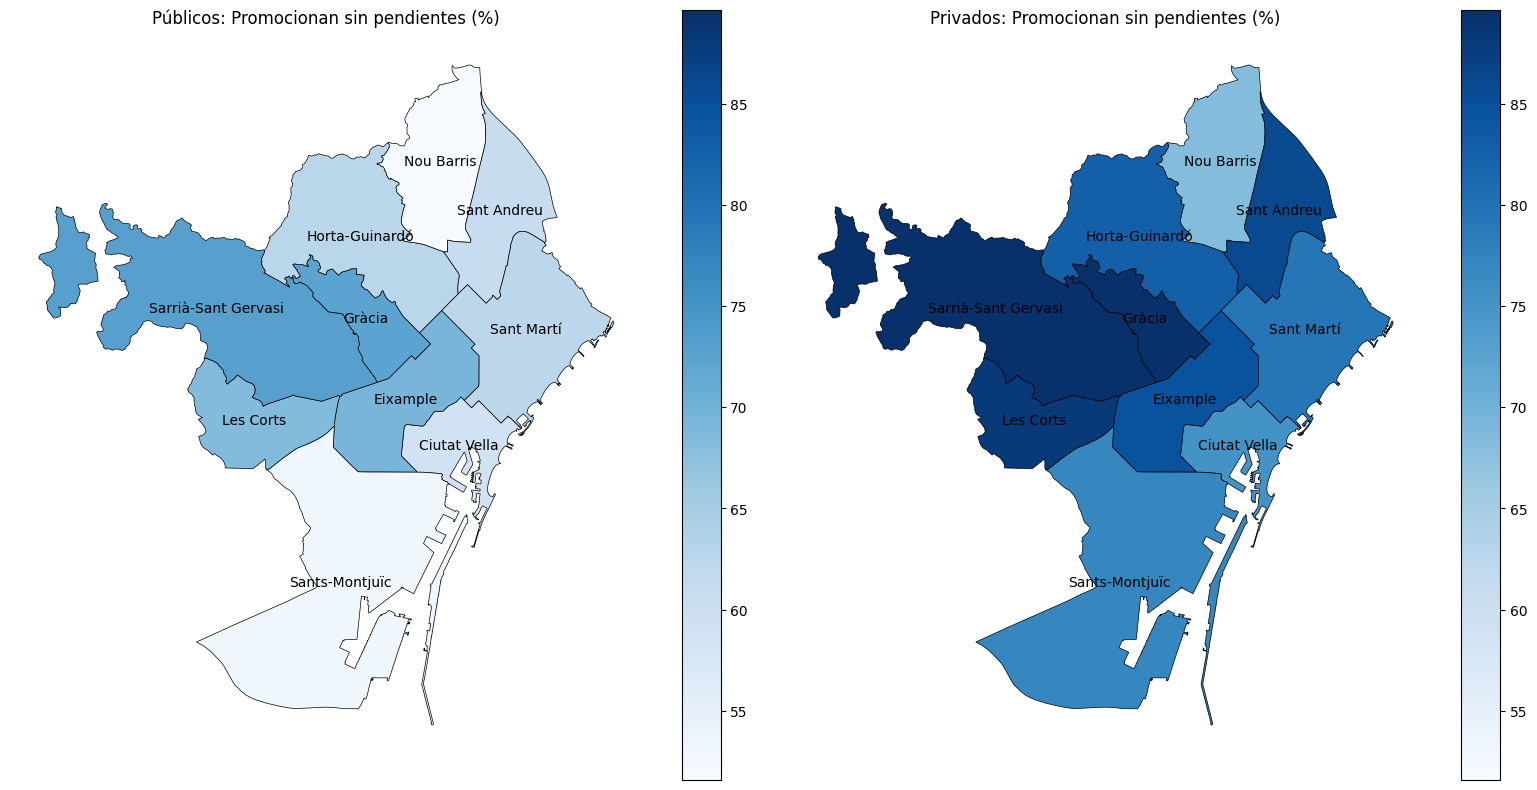

In [ ]:
vmin = min(gdf_publicos["porcentaje"].min(),
           gdf_privados["porcentaje"].min())

vmax = max(gdf_publicos["porcentaje"].max(),
           gdf_privados["porcentaje"].max())



# Crear centroides (GeoPandas puede avisar → es normal)
gdf_publicos["centroid"] = gdf_publicos.geometry.centroid
gdf_privados["centroid"] = gdf_privados.geometry.centroid



# vmin / vmax ya calculados previamente
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# --- Mapa públicos ---
gdf_publicos.plot(
    column="porcentaje",
    cmap="Blues",
    legend=True,
    vmin=vmin,
    vmax=vmax,
    edgecolor="black",
    linewidth=0.5,
    ax=ax[0]
)
ax[0].set_title("Públicos: Promocionan sin pendientes (%)")
ax[0].axis("off")

# Añadir nombres
for idx, row in gdf_publicos.iterrows():
    ax[0].text(
        row["centroid"].x,
        row["centroid"].y,
        row["nom_districte"],
        fontsize=10,
        ha="center",
        va="center",
        color="black"
    )

# --- Mapa privados ---
gdf_privados.plot(
    column="porcentaje",
    cmap="Blues",
    legend=True,
    vmin=vmin,
    vmax=vmax,
    edgecolor="black",
    linewidth=0.5,
    ax=ax[1]
)
ax[1].set_title("Privados: Promocionan sin pendientes (%)")
ax[1].axis("off")

# Añadir nombres
for idx, row in gdf_privados.iterrows():
    ax[1].text(
        row["centroid"].x,
        row["centroid"].y,
        row["nom_districte"],
        fontsize=10,
        ha="center",
        va="center",
        color="black"
    )

plt.tight_layout()
plt.show()


C:\Users\anica\AppData\Local\Temp\ipykernel_39640\133195456.py:20: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




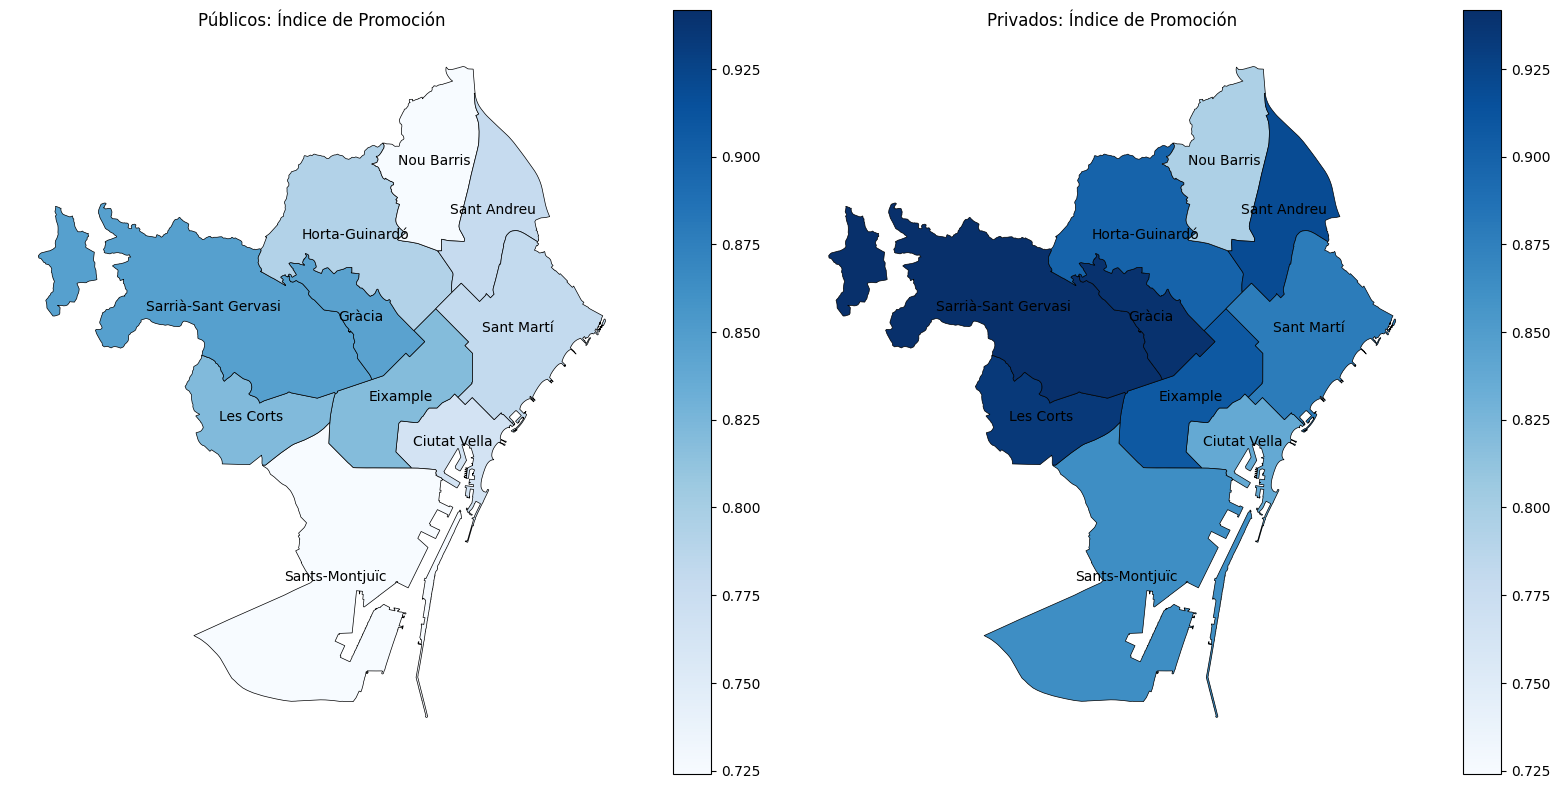

In [98]:
# Asegurar que el código distrito es entero
resultados["Codi districte"] = resultados["Codi districte"].astype(int)

# Crear Series separadas para público y privado
resultados_public = resultados[resultados["Naturalesa"] == "PÚBLIC"].set_index("Codi districte")["Indice"]
resultados_privat = resultados[resultados["Naturalesa"] == "PRIVAT"].set_index("Codi districte")["Indice"]

# Crear el GeoDataFrame
gdf_resultados = df_bcn_disctricts.copy()

# Mapear correctamente
gdf_resultados["Indice_Public"] = gdf_resultados["Codi_Districte"].map(resultados_public)
gdf_resultados["Indice_Privat"] = gdf_resultados["Codi_Districte"].map(resultados_privat)

# Ahora puedes calcular vmin y vmax correctamente
vmin = min(gdf_resultados["Indice_Public"].min(), gdf_resultados["Indice_Privat"].min())
vmax = max(gdf_resultados["Indice_Public"].max(), gdf_resultados["Indice_Privat"].max())

# Crear centroides
gdf_resultados["centroid"] = gdf_resultados.geometry.centroid

# Crear el plot
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# --- Mapa públicos ---
gdf_resultados.plot(
    column="Indice_Public",
    cmap="Blues",
    legend=True,
    vmin=vmin,
    vmax=vmax,
    edgecolor="black",
    linewidth=0.5,
    ax=ax[0]
)
ax[0].set_title("Públicos: Índice de Promoción")
ax[0].axis("off")

# Añadir nombres
for idx, row in gdf_resultados.iterrows():
    ax[0].text(
        row["centroid"].x,
        row["centroid"].y,
        row["nom_districte"],
        fontsize=10,
        ha="center",
        va="center",
        color="black"
    )

# --- Mapa privados ---
gdf_resultados.plot(
    column="Indice_Privat",
    cmap="Blues",
    legend=True,
    vmin=vmin,
    vmax=vmax,
    edgecolor="black",
    linewidth=0.5,
    ax=ax[1]
)
ax[1].set_title("Privados: Índice de Promoción")
ax[1].axis("off")

# Añadir nombres
for idx, row in gdf_resultados.iterrows():
    ax[1].text(
        row["centroid"].x,
        row["centroid"].y,
        row["nom_districte"],
        fontsize=10,
        ha="center",
        va="center",
        color="black"
    )

plt.tight_layout()
plt.show()


In [99]:
# Filtrar solo públicos y normalizar
gdf_publicos = gdf_resultados.copy()

# Normalizar el índice entre 0 y 1
indice_public = gdf_publicos["Indice_Public"]
min_val = indice_public.min()
max_val = indice_public.max()

# Aplicar normalización min-max
gdf_publicos["Indice_Normalizado"] = (indice_public - min_val) / (max_val - min_val)

# Verificar resultado
print("Estadísticas del índice normalizado:")
print(f"Mínimo: {gdf_publicos['Indice_Normalizado'].min():.3f}")
print(f"Máximo: {gdf_publicos['Indice_Normalizado'].max():.3f}")
print(f"Media: {gdf_publicos['Indice_Normalizado'].mean():.3f}")

Estadísticas del índice normalizado:
Mínimo: 0.000
Máximo: 1.000
Media: 0.532


C:\Users\anica\AppData\Local\Temp\ipykernel_39640\3715211361.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




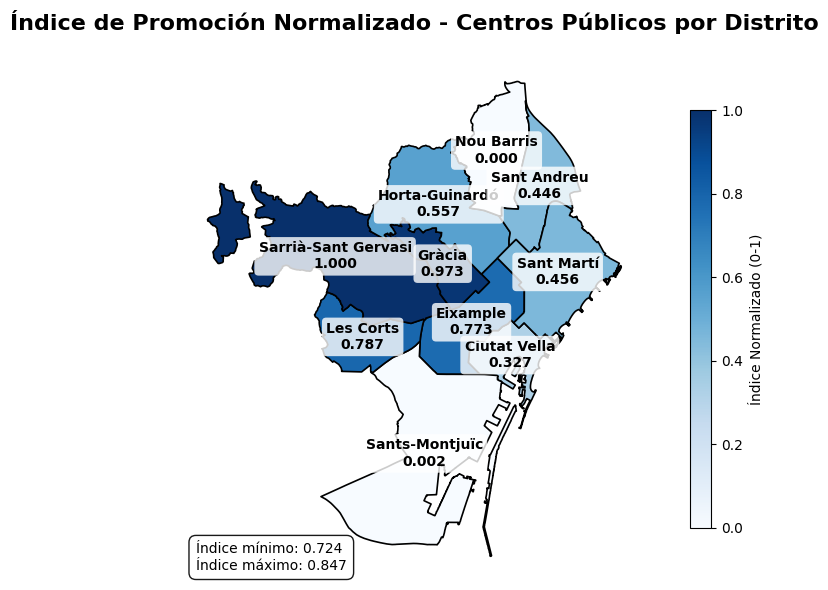


📊 RESUMEN DE ÍNDICES NORMALIZADOS - PÚBLICOS
      nom_districte  Indice_Public  Indice_Normalizado
Sarrià-Sant Gervasi       0.847361            1.000000
             Gràcia       0.844020            0.972931
          Les Corts       0.821094            0.787193
           Eixample       0.819287            0.772557
     Horta-Guinardó       0.792731            0.557406
         Sant Martí       0.780253            0.456319
        Sant Andreu       0.779006            0.446209
       Ciutat Vella       0.764286            0.326954
     Sants-Montjuïc       0.724196            0.002163
         Nou Barris       0.723929            0.000000


In [106]:
# Filtrar y normalizar índices públicos
gdf_publicos = gdf_resultados.copy()

# Normalizar el índice entre 0 y 1
indice_public = gdf_publicos["Indice_Public"]
min_val = indice_public.min()
max_val = indice_public.max()

gdf_publicos["Indice_Normalizado"] = (indice_public - min_val) / (max_val - min_val)

# Crear centroides
gdf_publicos["centroid"] = gdf_publicos.geometry.centroid

# Crear el plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Mapa de índices normalizados
gdf_publicos.plot(
    column="Indice_Normalizado",
    cmap="Blues",  # Esquema de colores rojo-amarillo-verde
    legend=True,
    vmin=0,
    vmax=1,
    edgecolor="black",
    linewidth=1.2,
    ax=ax,
    legend_kwds={
        'shrink': 0.8,
        'label': 'Índice Normalizado (0-1)'
    }
)

ax.set_title("Índice de Promoción Normalizado - Centros Públicos por Distrito", 
             fontsize=16, fontweight='bold', pad=20)
ax.axis("off")

# Añadir nombres de distritos y valores
for idx, row in gdf_publicos.iterrows():
    ax.text(
        row["centroid"].x,
        row["centroid"].y,
        f"{row['nom_districte']}\n{row['Indice_Normalizado']:.3f}",
        fontsize=10,
        ha="center",
        va="center",
        color="black",
        weight="bold",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8, edgecolor="none")
    )

# Añadir información adicional en la esquina
ax.text(
    0.02, 0.02, 
    f"Índice mínimo: {min_val:.3f}\nÍndice máximo: {max_val:.3f}",
    transform=ax.transAxes,
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.9)
)

plt.tight_layout()
plt.show()

# Mostrar tabla resumen
print("\n📊 RESUMEN DE ÍNDICES NORMALIZADOS - PÚBLICOS")
print("="*50)
resumen = gdf_publicos[["nom_districte", "Indice_Public", "Indice_Normalizado"]].sort_values("Indice_Normalizado", ascending=False)
print(resumen.to_string(index=False))

In [10]:
df_rendas=pd.read_csv('data/2022_renda_disponible_llars_per_persona.csv', delimiter=',')

df_rendas_districte = (
    df_rendas
    .groupby("Codi_Districte")["Import_Euros"]
    .mean()
    .reset_index()
)


rentas_idx = df_rendas_districte.set_index("Codi_Districte")["Import_Euros"]

gdf_rendas_districte = df_bcn_disctricts.copy()
gdf_rendas_districte["Import_Euros"] = gdf_rendas_districte["Codi_Districte"].map(rentas_idx)

gdf_rendas_districte.head()


,Codi_Districte,nom_districte,geometria_etrs89,geometria_wgs84,geometry,Import_Euros
0,1,Ciutat Vella,"POLYGON ((431733.736 4582441.816, 431557.5115 ...","POLYGON ((2.18345134701381 41.3906119681235, 2...","POLYGON ((2.18345 41.39061, 2.18132 41.39222, ...",17033.314815
1,2,Eixample,"POLYGON ((432033.1836 4583665.0318, 431837.083...","POLYGON ((2.18689546486771 41.4016544763739, 2...","POLYGON ((2.1869 41.40165, 2.18453 41.40345, 2...",26005.300578
2,3,Sants-Montjuïc,"MULTIPOLYGON (((431001.6 4577921.76, 430999.65...",MULTIPOLYGON (((2.17520933722813 41.3498386054...,"MULTIPOLYGON (((2.17521 41.34984, 2.17519 41.3...",20463.529915
3,4,Les Corts,"POLYGON ((425054.6701 4583672.5601, 425047.220...","POLYGON ((2.10341813050026 41.4011020711442, 2...","POLYGON ((2.10342 41.4011, 2.10333 41.40111, 2...",29393.789474
4,5,Sarrià-Sant Gervasi,"MULTIPOLYGON (((421380.6 4587521.9, 421367.7 4...",MULTIPOLYGON (((2.05896991836021 41.4354197742...,"MULTIPOLYGON (((2.05897 41.43542, 2.05881 41.4...",35155.530612


C:\Users\anica\AppData\Local\Temp\ipykernel_39640\1896931953.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_publicos["centroid"] = gdf_publicos.geometry.centroid
C:\Users\anica\AppData\Local\Temp\ipykernel_39640\1896931953.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_rendas_districte["centroid"] = gdf_rendas_districte.geometry.centroid


(np.float64(2.043547300698213),
 np.float64(2.236830600437898),
 np.float64(41.30947556993511),
 np.float64(41.47586054485192))

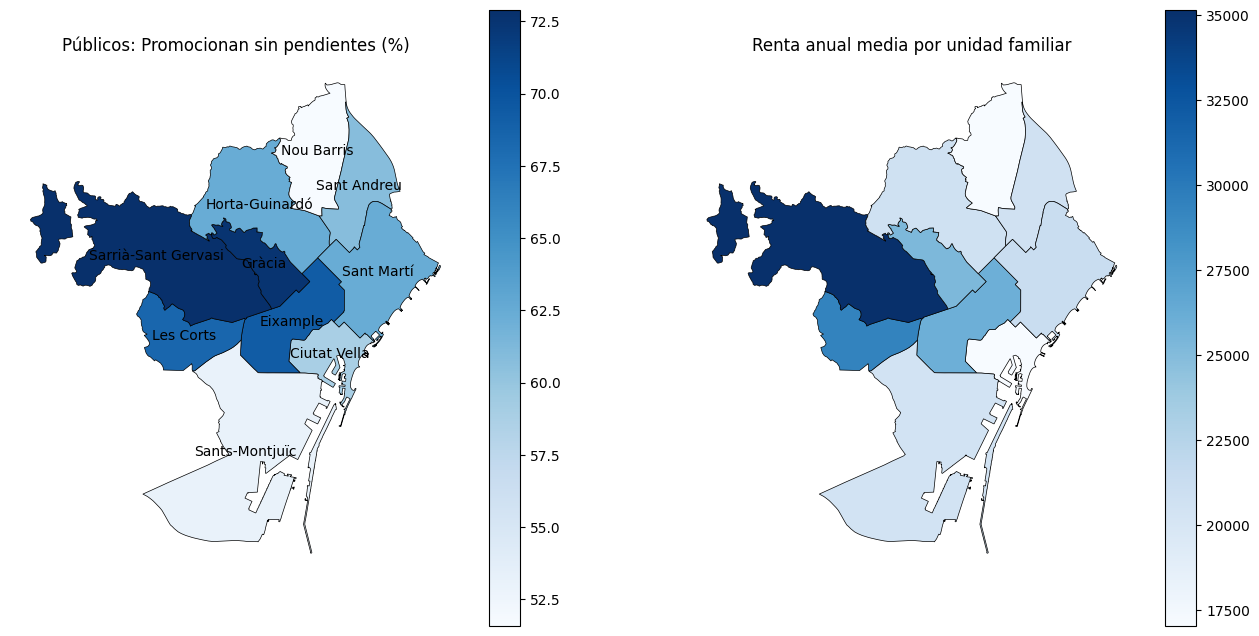

In [11]:
vmin = min(gdf_publicos["porcentaje"].min(),
           gdf_privados["porcentaje"].min())

vmax = max(gdf_publicos["porcentaje"].max(),
           gdf_privados["porcentaje"].max())



# Crear centroides (GeoPandas puede avisar → es normal)
gdf_publicos["centroid"] = gdf_publicos.geometry.centroid
gdf_rendas_districte["centroid"] = gdf_rendas_districte.geometry.centroid



# vmin / vmax ya calculados previamente
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# --- Mapa públicos ---
gdf_publicos.plot(
    column="porcentaje",
    cmap="Blues",
    legend=True,
    edgecolor="black",
    linewidth=0.5,
    ax=ax[0]
)
ax[0].set_title("Públicos: Promocionan sin pendientes (%)")
ax[0].axis("off")

# Añadir nombres
for idx, row in gdf_publicos.iterrows():
    ax[0].text(
        row["centroid"].x,
        row["centroid"].y,
        row["nom_districte"],
        fontsize=10,
        ha="center",
        va="center",
        color="black"
    )

# --- Mapa privados ---
gdf_rendas_districte.plot(
    column="Import_Euros",
    cmap="Blues",
    legend=True,
    edgecolor="black",
    linewidth=0.5,
    ax=ax[1]
)
ax[1].set_title("Renta anual media por unidad familiar")
ax[1].axis("off")

In [12]:
df_equipaments=pd.read_csv('data_Ana/Equipaments_de_Catalunya_20251110.csv', delimiter=',')

df_equipaments_bcn=df_equipaments[df_equipaments["POBLACIO"]=="Barcelona"].reset_index()

df_equipaments_bcn=df_equipaments_bcn[['NOM','CATEGORIA',"UTMX","UTMY","LONGITUD","LATITUD","DATA_MODIFICACIO","PROPIETATS","Georeferència"]]


df_equipaments_bcn['CATEGORIA'].head()



0    Educació. Formació|Educació infantil de 2n cic...
1                               Cultura|Biblioteques||
2    Educació. Formació|Educació infantil de 1r cic...
3    Educació. Formació|Educació infantil de 2n cic...
4    Educació. Formació|Educació infantil de 2n cic...
Name: CATEGORIA, dtype: object

In [13]:
import pandas as pd

# Suponemos que tu DF se llama df_equipaments_bcn
# y que la columna de categorías se llama "CATEGORIA"

def parse_category(raw):
    """
    Toma una cadena de categorías como:
    'Educació. Formació|ESO||Educació. Formació|BATX||'
    
    Devuelve:
    - categoría principal (Educació. Formació)
    - lista de subcategorías (["ESO", "BATX"])
    """
    if pd.isna(raw):
        return None, None
    
    # Dividir por “||” y eliminar vacíos
    items = [c for c in raw.split("||") if c.strip() != ""]
    
    if len(items) == 0:
        return None, None
    
    # Extraer categoría principal y subcategorías
    subcats = []
    principal = None
    
    for item in items:
        if "|" not in item:
            continue
            
        cat, sub = item.split("|", 1)
        cat = cat.strip()
        sub = sub.strip()
        
        if principal is None:
            principal = cat
        
        subcats.append(sub)
    
    return principal, subcats


# Aplicar la función
df_equipaments_bcn[['Categoria_principal', 'Subcategories']] = (
    df_equipaments_bcn['CATEGORIA']
    .apply(lambda x: pd.Series(parse_category(x)))
)

df_equipaments_bcn.head()



,NOM,CATEGORIA,UTMX,UTMY,LONGITUD,LATITUD,DATA_MODIFICACIO,PROPIETATS,Georeferència,Categoria_principal,Subcategories
0,Escola Cal Maiol,Educació. Formació|Educació infantil de 2n cic...,"427.731,000","4.580.501,000","2,135812000","41,372784000",11/10/2025 01:16:41 PM,Codi Territoria|Consorci d'Educació de Barcelo...,POINT (2.135812 41.372784),Educació. Formació,"[Educació infantil de 2n cicle (EINF2C), Educa..."
1,MUSEU MARÍTIM. BIBLIOTECA,Cultura|Biblioteques||,"431.116,620","4.580.833,650","2,176253406","41,376075036",11/10/2025 01:12:55 PM,Gestió|NA|Titularitat|Altres,POINT (2.176253406 41.376075036),Cultura,[Biblioteques]
2,Sagrado Corazón,Educació. Formació|Educació infantil de 1r cic...,"426.529,000","4.582.754,000","2,121163000","41,392962000",11/10/2025 01:16:41 PM,Codi Territoria|Consorci d'Educació de Barcelo...,POINT (2.121163 41.392962),Educació. Formació,"[Educació infantil de 1r cicle (EINF1C), Educa..."
3,Lys,Educació. Formació|Educació infantil de 2n cic...,"428.380,000","4.584.038,000","2,143154000","41,404694000",11/10/2025 01:16:41 PM,Codi Territoria|Consorci d'Educació de Barcelo...,POINT (2.143154 41.404694),Educació. Formació,"[Educació infantil de 2n cicle (EINF2C), Educa..."
4,Sadako,Educació. Formació|Educació infantil de 2n cic...,"427.639,000","4.585.516,000","2,134108000","41,417939000",11/10/2025 01:16:41 PM,Codi Territoria|Consorci d'Educació de Barcelo...,POINT (2.134108 41.417939),Educació. Formació,"[Educació infantil de 2n cicle (EINF2C), Educa..."


In [14]:
df_equipaments_bcn=df_equipaments_bcn[df_equipaments_bcn["Categoria_principal"]=="Educació. Formació"].reset_index()
#df_equipaments_bcn_ESO=df_equipaments_bcn[df_equipaments_bcn["Subcategories"]=="[Educació secundària obligatòria (ESO)]"].reset_index()
#df_equipaments_bcn_eso=df_equipaments_bcn[df_equipaments_bcn['Subcategories'].explode() == "Educació secundària obligatòria (ESO)"]
df_equipaments_bcn_eso = df_equipaments_bcn[
    df_equipaments_bcn['Subcategories'].apply(
        lambda lst: isinstance(lst, list) and 
                    "Educació secundària obligatòria (ESO)" in lst
    )
]


C:\Users\anica\AppData\Local\Temp\ipykernel_39640\4025000224.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_equipaments_bcn_eso['LONGITUD'] = df_equipaments_bcn_eso['LONGITUD'].astype(str).str.replace(',', '.').astype(float)
C:\Users\anica\AppData\Local\Temp\ipykernel_39640\4025000224.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_equipaments_bcn_eso['LATITUD']  = df_equipaments_bcn_eso['LATITUD'].astype(str).str.replace(',', '.').astype(float)
C:\Users\anica\AppData\Local\Temp\ipykernel_396

Puntos originales: 234
Puntos dentro de Barcelona: 234


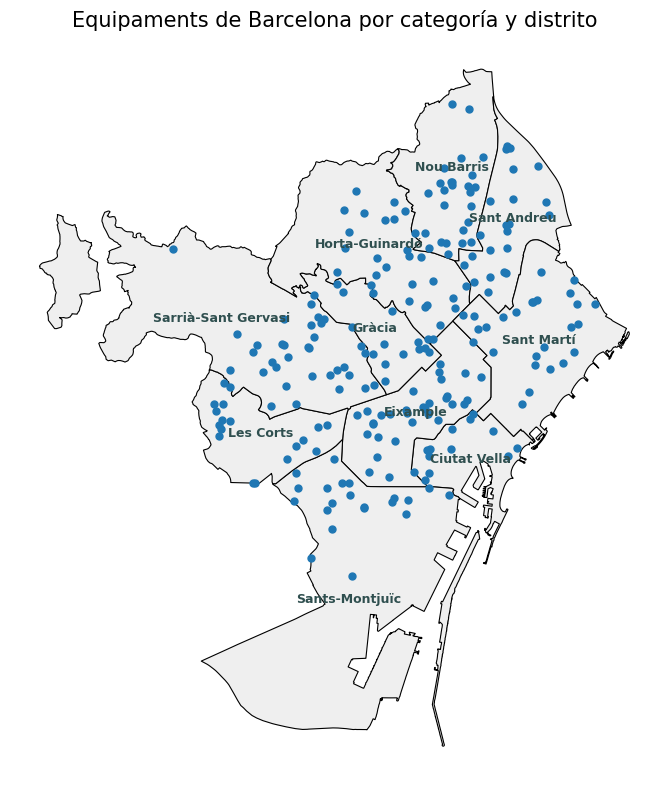

In [16]:
from shapely.geometry import Point


df_equipaments_bcn_eso['LONGITUD'] = df_equipaments_bcn_eso['LONGITUD'].astype(str).str.replace(',', '.').astype(float)
df_equipaments_bcn_eso['LATITUD']  = df_equipaments_bcn_eso['LATITUD'].astype(str).str.replace(',', '.').astype(float)

gdf_puntos = gpd.GeoDataFrame(
    df_equipaments_bcn_eso,   # ESTE debe ser el base
    geometry=gpd.points_from_xy(
        df_equipaments_bcn_eso['LONGITUD'],
        df_equipaments_bcn_eso['LATITUD']
    ),
    crs="EPSG:4326"
)
# Asegurar mismo CRS
gdf_puntos = gdf_puntos.to_crs(df_bcn_disctricts.crs)

# Polígono municipal
polygon_bcn = df_bcn_disctricts.unary_union

# Filtrar puntos que caen dentro
gdf_puntos = gdf_puntos[gdf_puntos.within(polygon_bcn)]

# Filtrar solo puntos que caen dentro del municipio
gdf_puntos_bcn = gdf_puntos[gdf_puntos.within(polygon_bcn)]

print("Puntos originales:", len(gdf_puntos))
print("Puntos dentro de Barcelona:", len(gdf_puntos_bcn))

# Spatial join
gdf_join = gpd.sjoin(
    gdf_puntos,
    df_bcn_disctricts[['Codi_Districte', 'nom_districte', 'geometry']],
    how='left',
    predicate='within'
)

# Filtrar cualquier punto sin distrito (seguridad extra)
gdf_join = gdf_join.dropna(subset=['Codi_Districte'])


if df_bcn_disctricts.crs != gdf_puntos.crs:
    gdf_puntos = gdf_puntos.to_crs(df_bcn_disctricts.crs)



fig, ax = plt.subplots(figsize=(8, 8))

# Mapa de distritos
df_bcn_disctricts.plot(
    ax=ax,
    edgecolor="black",
    linewidth=0.8,
    facecolor="#EFEFEF"
)





# Puntos de equipamientos
gdf_join.plot(
    ax=ax,
    markersize=25,
    #color=colors,
    label="Equipaments"
)

# ----------------------------------------------------------
# 7. ETIQUETAS DE DISTRITO EN SU CENTROIDE
# ----------------------------------------------------------
gdf_centroides = df_bcn_disctricts.copy()
gdf_centroides = gdf_centroides.to_crs(epsg=25831)  # CRS métrico para centroides
gdf_centroides['centroid'] = gdf_centroides.geometry.centroid
gdf_centroides['centroid'] = gdf_centroides['centroid'].to_crs(df_bcn_disctricts.crs)

for _, row in gdf_centroides.iterrows():
    ax.text(
        row['centroid'].x,
        row['centroid'].y,
        row['nom_districte'],
        ha='center',
        va='center',
        fontsize=9,
        fontweight="bold",
        color="darkslategray"
    )

# ----------------------------------------------------------
# 8. LEYENDA Y AJUSTES
# ----------------------------------------------------------
ax.set_title("Equipaments de Barcelona por categoría y distrito", fontsize=15)
ax.axis("off")




plt.tight_layout()
plt.show()




C:\Users\anica\AppData\Local\Temp\ipykernel_39640\1496371765.py:19: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon_bcn = df_bcn_disctricts.unary_union
C:\Users\anica\AppData\Local\Temp\ipykernel_39640\1496371765.py:37: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon_bcn = df_bcn_disctricts.unary_union


Puntos originales: 915
Puntos dentro de Barcelona: 915


C:\Users\anica\AppData\Local\Temp\ipykernel_39640\1496371765.py:131: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


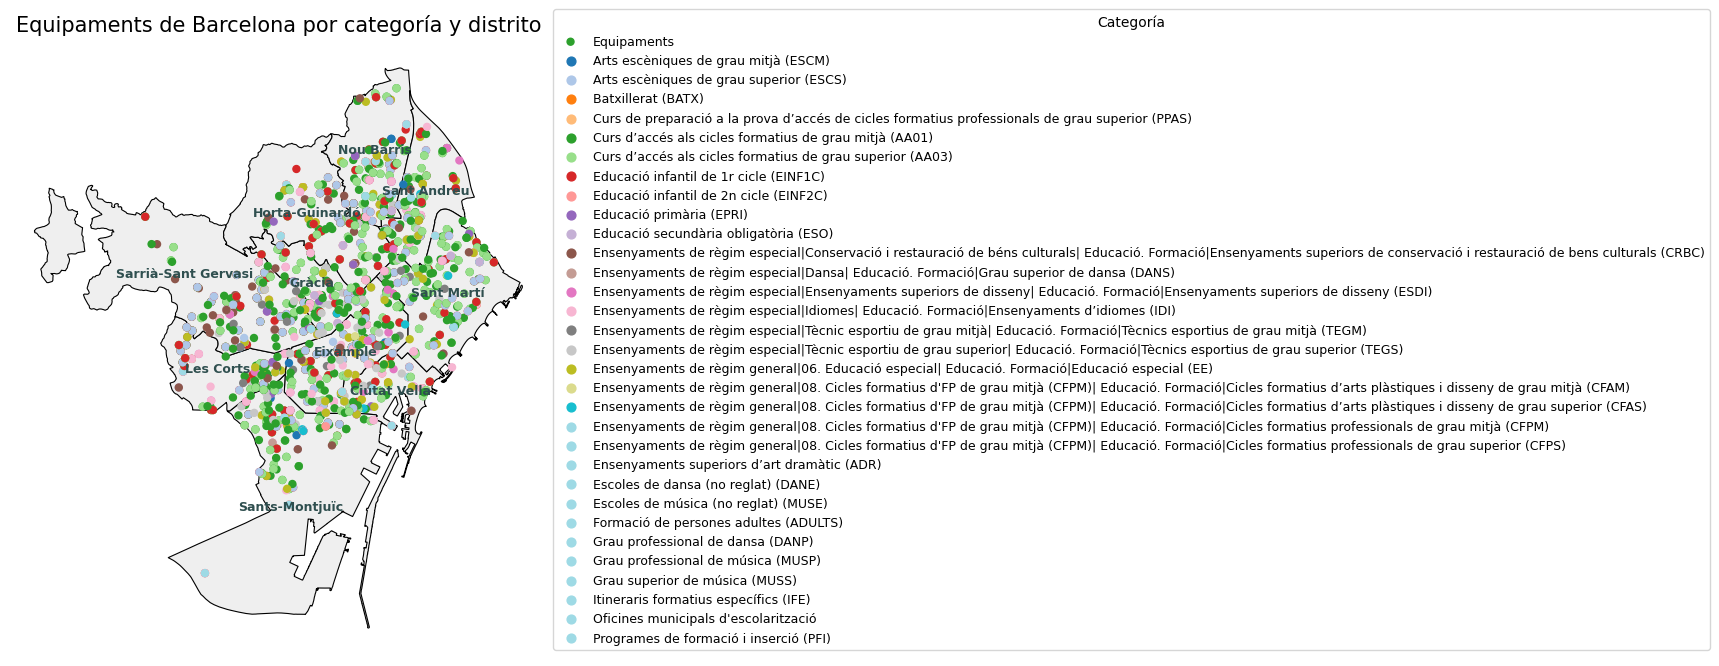

In [17]:
from shapely.geometry import Point


df_equipaments_bcn['LONGITUD'] = df_equipaments_bcn['LONGITUD'].astype(str).str.replace(',', '.').astype(float)
df_equipaments_bcn['LATITUD']  = df_equipaments_bcn['LATITUD'].astype(str).str.replace(',', '.').astype(float)

gdf_puntos = gpd.GeoDataFrame(
    df_equipaments_bcn,   # ESTE debe ser el base
    geometry=gpd.points_from_xy(
        df_equipaments_bcn['LONGITUD'],
        df_equipaments_bcn['LATITUD']
    ),
    crs="EPSG:4326"
)
# Asegurar mismo CRS
gdf_puntos = gdf_puntos.to_crs(df_bcn_disctricts.crs)

# Polígono municipal
polygon_bcn = df_bcn_disctricts.unary_union

# Filtrar puntos que caen dentro
gdf_puntos = gdf_puntos[gdf_puntos.within(polygon_bcn)]

# Spatial join
gdf_join = gpd.sjoin(
    gdf_puntos,
    df_bcn_disctricts[['Codi_Districte', 'nom_districte', 'geometry']],
    how='left',
    predicate='within'
)

# Filtrar cualquier punto sin distrito (seguridad extra)
gdf_join = gdf_join.dropna(subset=['Codi_Districte'])


# Polígono completo de Barcelona (unión de distritos)
polygon_bcn = df_bcn_disctricts.unary_union

# Filtrar solo puntos que caen dentro del municipio
gdf_puntos_bcn = gdf_puntos[gdf_puntos.within(polygon_bcn)]

print("Puntos originales:", len(gdf_puntos))
print("Puntos dentro de Barcelona:", len(gdf_puntos_bcn))

gdf_formacio = gdf_puntos_bcn[
    gdf_puntos_bcn["Categoria_principal"].str.contains("Educació", na=False)
].copy()

gdf_formacio = gdf_formacio.explode("Subcategories").reset_index(drop=True)

# Si hubiera subcategorías vacías, quitarlas
gdf_formacio = gdf_formacio[gdf_formacio["Subcategories"].notna()]

# Convertir a categorical para asignar colores
gdf_formacio["Subcategories"] = gdf_formacio["Subcategories"].astype("category")



# ----------------------------------------------------------
# 4. ASEGURAR QUE AMBOS GEODATAFRAMES TIENEN EL MISMO CRS
#    (Los distritos suelen venir en EPSG:25831)
# ----------------------------------------------------------
if df_bcn_disctricts.crs != gdf_formacio.crs:
    gdf_formacio = gdf_formacio.to_crs(df_bcn_disctricts.crs)


fig, ax = plt.subplots(figsize=(8, 8))

# Mapa de distritos
df_bcn_disctricts.plot(
    ax=ax,
    edgecolor="black",
    linewidth=0.8,
    facecolor="#EFEFEF"
)

# Colores por categoría
categorias = gdf_formacio['Subcategories'].astype("category")
colors = plt.cm.tab20(categorias.cat.codes / categorias.cat.codes.max())



# Puntos de equipamientos
gdf_formacio.plot(
    ax=ax,
    markersize=25,
    color=colors,
    label="Equipaments"
)

# ----------------------------------------------------------
# 7. ETIQUETAS DE DISTRITO EN SU CENTROIDE
# ----------------------------------------------------------
gdf_centroides = df_bcn_disctricts.copy()
gdf_centroides = gdf_centroides.to_crs(epsg=25831)  # CRS métrico para centroides
gdf_centroides['centroid'] = gdf_centroides.geometry.centroid
gdf_centroides['centroid'] = gdf_centroides['centroid'].to_crs(df_bcn_disctricts.crs)

for _, row in gdf_centroides.iterrows():
    ax.text(
        row['centroid'].x,
        row['centroid'].y,
        row['nom_districte'],
        ha='center',
        va='center',
        fontsize=9,
        fontweight="bold",
        color="darkslategray"
    )

# ----------------------------------------------------------
# 8. LEYENDA Y AJUSTES
# ----------------------------------------------------------
ax.set_title("Equipaments de Barcelona por categoría y distrito", fontsize=15)
ax.axis("off")

# Crear una leyenda para categorías
for cat, color in zip(categorias.cat.categories, plt.cm.tab20(range(len(categorias.cat.categories)))):
    ax.scatter([], [], color=color, label=cat, s=40)


ax.legend(
     title="Categoría",
     loc="lower left",
     bbox_to_anchor=(1, 0),
     fontsize=9
 )



plt.tight_layout()
plt.show()




In [18]:
df_nivels=pd.read_csv("data_Quintin/BCN_poblacion_16años_formacion_sexo/2022_pad_mdbas_niv-educa-esta_sexe.csv", delimiter=',')
df_nivels['Valor'] = (
    df_nivels['Valor']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .str.replace(' ', '', regex=False)     # por si hay espacios
)

df_nivels['Valor'] = pd.to_numeric(df_nivels['Valor'], errors='coerce')

df_reducido = df_nivels[[
    'Codi_Districte',
    'Nom_Districte',
    'NIV_EDUCA_esta',
    'Valor'
]]
df_agrupado = (
    df_reducido
    .groupby(['Codi_Districte', 'Nom_Districte', 'NIV_EDUCA_esta'], as_index=False)
    .agg({'Valor': 'sum'})
)

df_nivels = df_agrupado.copy()

df_nivels['Porcentaje'] = (
    df_nivels['Valor'] /
    df_nivels.groupby('Codi_Districte')['Valor'].transform('sum')
) * 100



df_nivels.head(10)

,Codi_Districte,Nom_Districte,NIV_EDUCA_esta,Valor,Porcentaje
0,1,Ciutat Vella,1,1072.0,1.131458
1,1,Ciutat Vella,2,19227.0,20.293419
2,1,Ciutat Vella,3,22468.0,23.714180
3,1,Ciutat Vella,4,20198.0,21.318275
4,1,Ciutat Vella,5,30823.0,32.532587
5,1,Ciutat Vella,6,957.0,1.010080
6,2,Eixample,1,1789.0,0.752538
7,2,Eixample,2,22675.0,9.538172
8,2,Eixample,3,39571.0,16.645424
9,2,Eixample,4,61407.0,25.830673


9,NIV_EDUCA_esta,1,Sense estudis,Sin estudios,Less than primary education
9,NIV_EDUCA_esta,2,"Estudis primaris, certificat d'escolaritat, EGB","Estudios primarios, certificado de escolaridad, EGB",Primary education
9,NIV_EDUCA_esta,3,"Batxillerat elemental, graduat escolar, ESO, FPI","Bachillerato elemental, graduado escolar, ESO, FPI",Lower secondary education
9,NIV_EDUCA_esta,4,"Batxillerat superior, BUP, COU, FPII, CFGM grau mitjà","Bachillerato superior, BUP, COU, FPII, CFGM grado medio",Upper secondary or post-secondary non-tertiary education
9,NIV_EDUCA_esta,5,"Estudis universitaris, CFGS grau superior","Estudios universitarios, CFGS grado superior",Tertiary education
9,NIV_EDUCA_esta,6,No consta,No consta,Not available

In [ ]:
# Unir los datos educativos con las geometrías
df_geo_edu = df_bcn_disctricts.merge(df_nivels, on='Codi_Districte', how='left')
df_geo_edu.head()

,Codi_Districte,nom_districte,geometria_etrs89,geometria_wgs84,geometry,Nom_Districte,NIV_EDUCA_esta,Valor,Porcentaje
0,1,Ciutat Vella,"POLYGON ((431733.736 4582441.816, 431557.5115 ...","POLYGON ((2.18345134701381 41.3906119681235, 2...","POLYGON ((2.18345 41.39061, 2.18132 41.39222, ...",Ciutat Vella,1,1072.0,1.131458
1,1,Ciutat Vella,"POLYGON ((431733.736 4582441.816, 431557.5115 ...","POLYGON ((2.18345134701381 41.3906119681235, 2...","POLYGON ((2.18345 41.39061, 2.18132 41.39222, ...",Ciutat Vella,2,19227.0,20.293419
2,1,Ciutat Vella,"POLYGON ((431733.736 4582441.816, 431557.5115 ...","POLYGON ((2.18345134701381 41.3906119681235, 2...","POLYGON ((2.18345 41.39061, 2.18132 41.39222, ...",Ciutat Vella,3,22468.0,23.714180
3,1,Ciutat Vella,"POLYGON ((431733.736 4582441.816, 431557.5115 ...","POLYGON ((2.18345134701381 41.3906119681235, 2...","POLYGON ((2.18345 41.39061, 2.18132 41.39222, ...",Ciutat Vella,4,20198.0,21.318275
4,1,Ciutat Vella,"POLYGON ((431733.736 4582441.816, 431557.5115 ...","POLYGON ((2.18345134701381 41.3906119681235, 2...","POLYGON ((2.18345 41.39061, 2.18132 41.39222, ...",Ciutat Vella,5,30823.0,32.532587


In [49]:
# Unir resultados académicos con datos educativos
df_nivels['Codi_Districte'] = df_nivels['Codi_Districte'].astype(int)


# Filtrar niveles 2-5 (omitir 1 y 6)
df_nivels_filtrado = df_nivels[df_nivels['NIV_EDUCA_esta'].between(2, 5)].copy()

# Recalcular porcentajes dentro de los niveles 2-5 para cada distrito
total_por_distrito = df_nivels_filtrado.groupby('Codi_Districte')['Valor'].transform('sum')
df_nivels_filtrado['Porcentaje_ajustado'] = (df_nivels_filtrado['Valor'] / total_por_distrito) * 100

# Unir con resultados académicos
df_comparativa = df_nivels_filtrado.merge(
    gdf_publicos[['Codi_Districte', 'porcentaje']].rename(columns={'porcentaje': 'porcentaje_promocion'}),
    on='Codi_Districte',
    how='left'
)

# Ordenar distritos por porcentaje de promoción
orden_distritos = gdf_publicos.sort_values('porcentaje', ascending=False)['nom_districte'].values
df_comparativa['Nom_Districte'] = pd.Categorical(
    df_comparativa['Nom_Districte'], 
    categories=orden_distritos, 
    ordered=True
)

C:\Users\anica\AppData\Local\Temp\ipykernel_39640\350139339.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



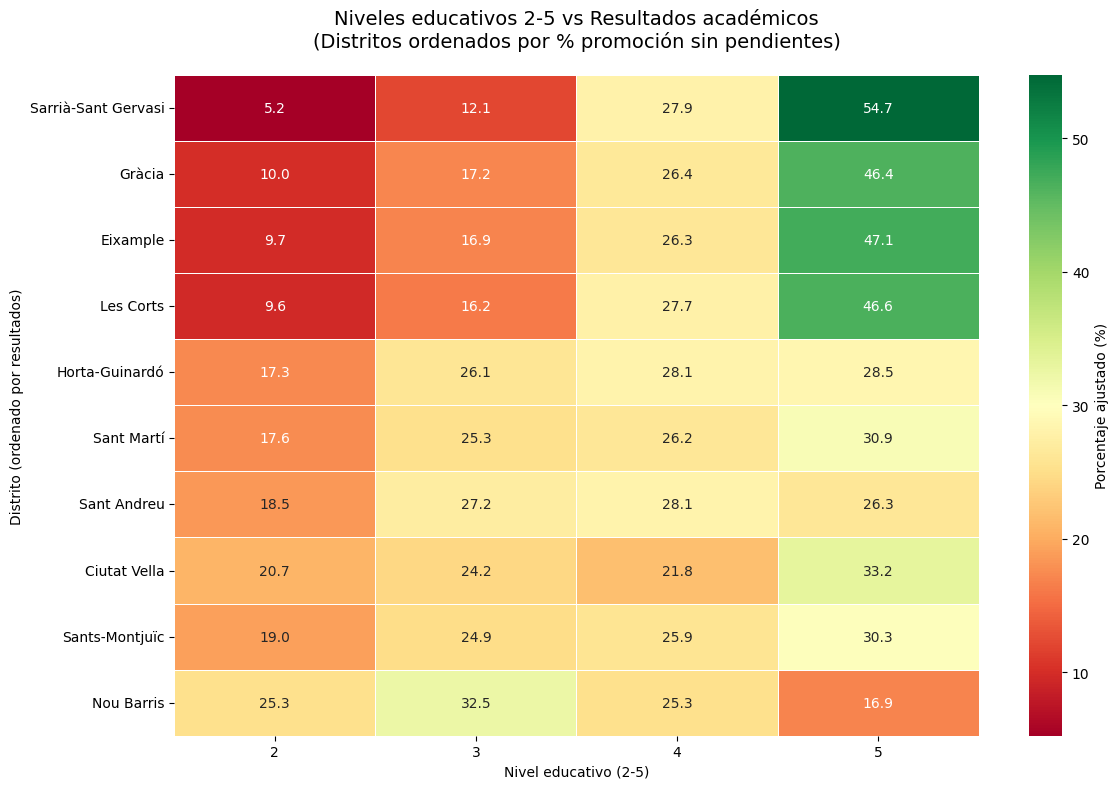

In [50]:
# Crear pivot table con niveles 2-5 ordenada por resultados académicos
pivot_ordenado = df_comparativa.pivot_table(
    index='Nom_Districte', 
    columns='NIV_EDUCA_esta', 
    values='Porcentaje_ajustado'
).reindex(orden_distritos)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_ordenado, 
            annot=True, 
            cmap='RdYlGn', 
            fmt='.1f',
            cbar_kws={'label': 'Porcentaje ajustado (%)'},
            linewidths=0.5)
plt.title('Niveles educativos 2-5 vs Resultados académicos\n(Distritos ordenados por % promoción sin pendientes)',
          fontsize=14, pad=20)
plt.xlabel('Nivel educativo (2-5)')
plt.ylabel('Distrito (ordenado por resultados)')
plt.tight_layout()
plt.show()

C:\Users\anica\AppData\Local\Temp\ipykernel_39640\1358050000.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



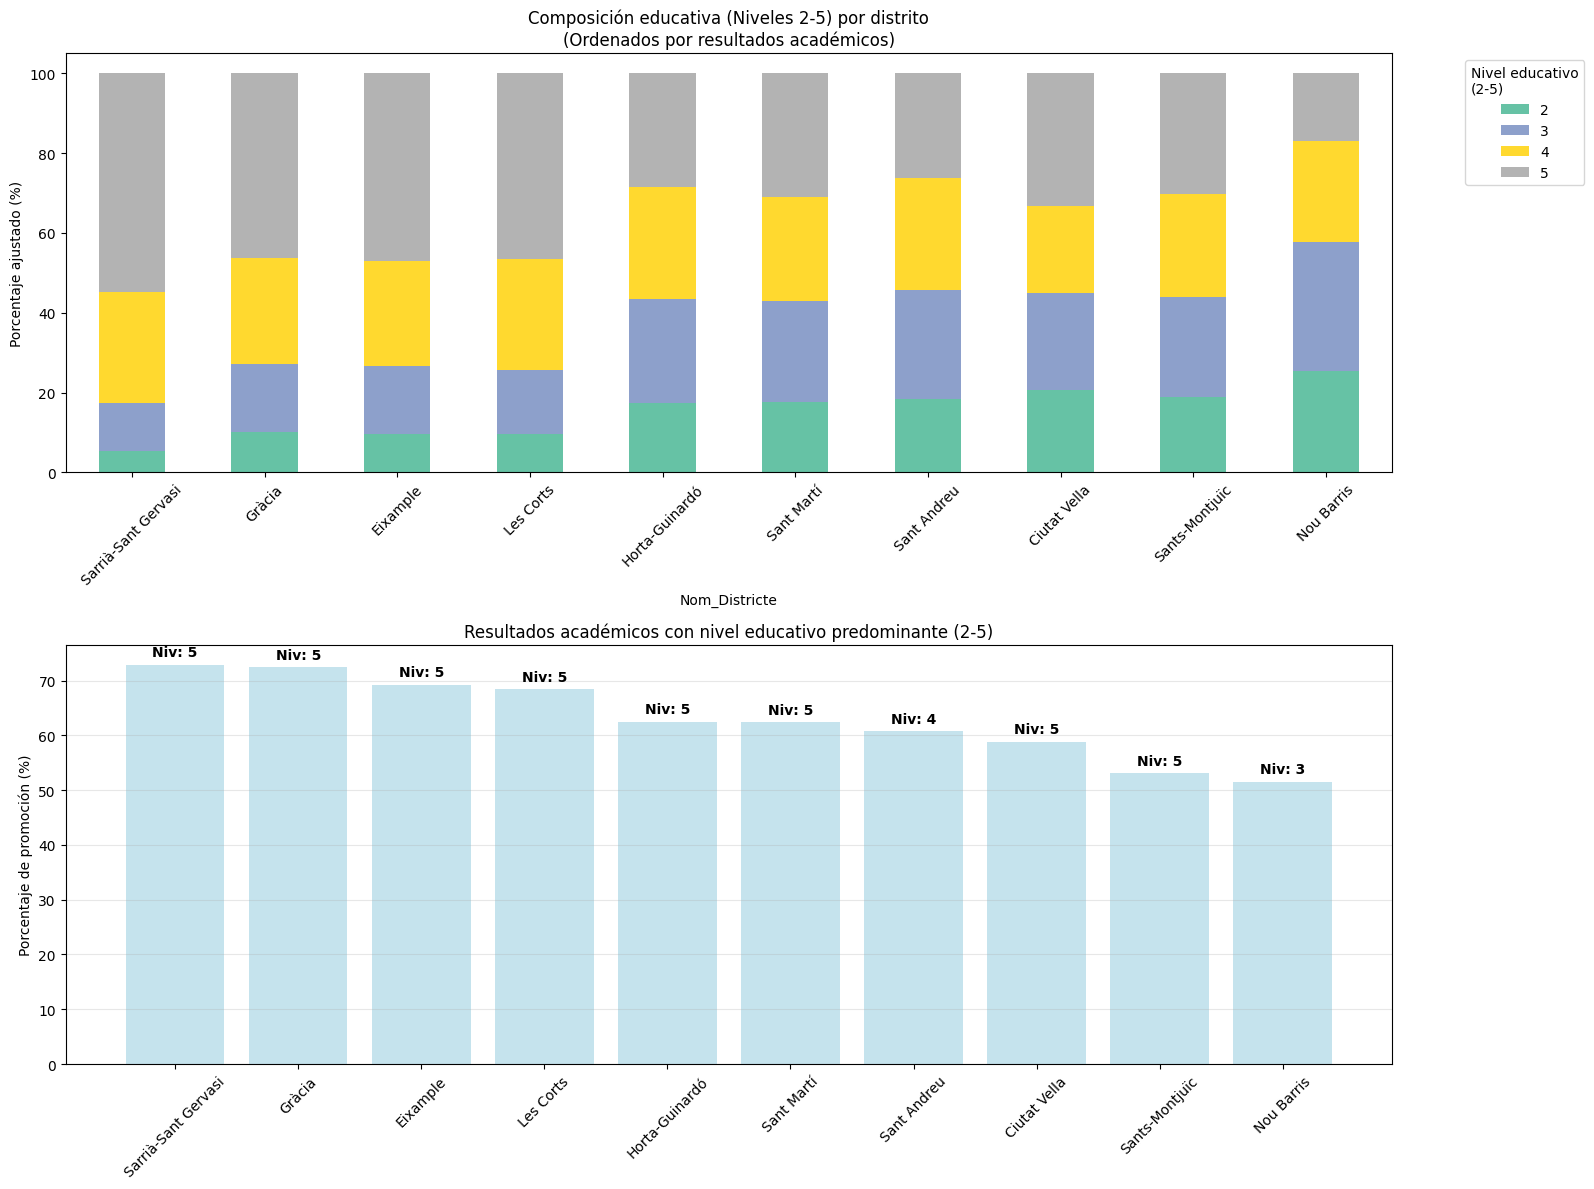

In [51]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Gráfico 1: Composición educativa (niveles 2-5) ordenada por resultados
pivot_ordenado.plot(kind='bar', stacked=True, ax=ax1, colormap='Set2')
ax1.set_title('Composición educativa (Niveles 2-5) por distrito\n(Ordenados por resultados académicos)')
ax1.set_ylabel('Porcentaje ajustado (%)')
ax1.legend(title='Nivel educativo\n(2-5)', bbox_to_anchor=(1.05, 1))
ax1.tick_params(axis='x', rotation=45)

# Gráfico 2: Resultados académicos vs Nivel educativo predominante (2-5)
nivel_predominante = df_comparativa.loc[df_comparativa.groupby('Nom_Districte')['Porcentaje_ajustado'].idxmax()]
nivel_predominante = nivel_predominante.set_index('Nom_Districte').reindex(orden_distritos)

# Barras de resultados académicos
bars = ax2.bar(nivel_predominante.index, 
               nivel_predominante['porcentaje_promocion'],
               color='lightblue', alpha=0.7)

# Añadir etiquetas con el nivel educativo predominante
for i, (bar, distrito) in enumerate(zip(bars, nivel_predominante.index)):
    nivel_pred = nivel_predominante.loc[distrito, 'NIV_EDUCA_esta']
    altura = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, altura + 1, 
             f'Niv: {nivel_pred}', ha='center', va='bottom', fontweight='bold')

ax2.set_title('Resultados académicos con nivel educativo predominante (2-5)')
ax2.set_ylabel('Porcentaje de promoción (%)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\anica\AppData\Local\Temp\ipykernel_39640\2388407008.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



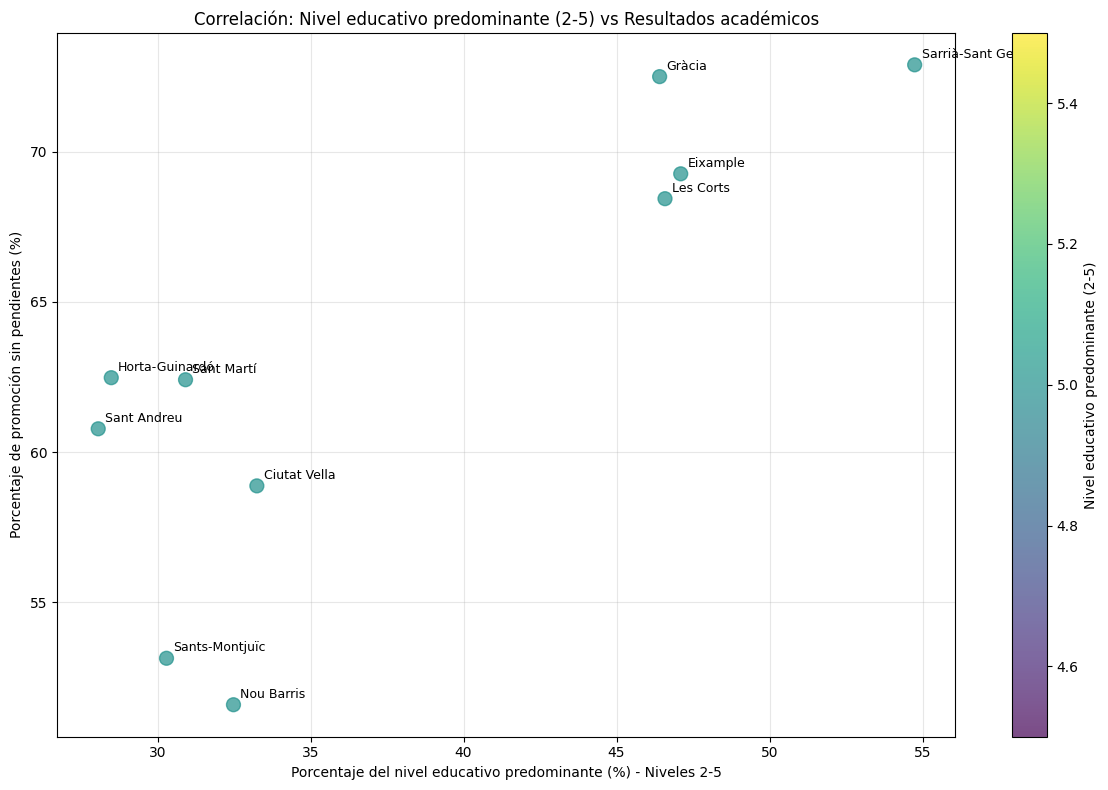

In [52]:
# Calcular métricas por distrito (solo niveles 2-5)
metricas_distritos = df_comparativa.groupby('Nom_Districte').agg({
    'porcentaje_promocion': 'first',
    'Porcentaje_ajustado': lambda x: x.iloc[x.argmax()],  # Porcentaje del nivel predominante
    'NIV_EDUCA_esta': lambda x: x.iloc[x.argmax()]  # Nivel predominante (2-5)
}).reset_index()

# Ordenar por resultados
metricas_distritos = metricas_distritos.sort_values('porcentaje_promocion', ascending=False)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(metricas_distritos['Porcentaje_ajustado'], 
                      metricas_distritos['porcentaje_promocion'],
                      c=metricas_distritos['NIV_EDUCA_esta'], 
                      cmap='viridis', s=100, alpha=0.7)

# Añadir etiquetas de distritos
for i, row in metricas_distritos.iterrows():
    plt.annotate(row['Nom_Districte'], 
                (row['Porcentaje_ajustado'], row['porcentaje_promocion']),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.colorbar(scatter, label='Nivel educativo predominante (2-5)')
plt.xlabel('Porcentaje del nivel educativo predominante (%) - Niveles 2-5')
plt.ylabel('Porcentaje de promoción sin pendientes (%)')
plt.title('Correlación: Nivel educativo predominante (2-5) vs Resultados académicos')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [56]:
metricas_distritos

,Nom_Districte,porcentaje_promocion,Porcentaje_ajustado,NIV_EDUCA_esta
0,Sarrià-Sant Gervasi,72.895863,54.742812,5
1,Gràcia,72.503083,46.407815,5
2,Eixample,69.266247,47.097152,5
3,Les Corts,68.437500,46.583561,5
4,Horta-Guinardó,62.475442,28.486163,5
5,Sant Martí,62.407603,30.913551,5
6,Sant Andreu,60.773481,28.060103,5
7,Ciutat Vella,58.872180,33.244532,5
8,Sants-Montjuïc,53.130288,30.291534,5
9,Nou Barris,51.582868,32.480263,5


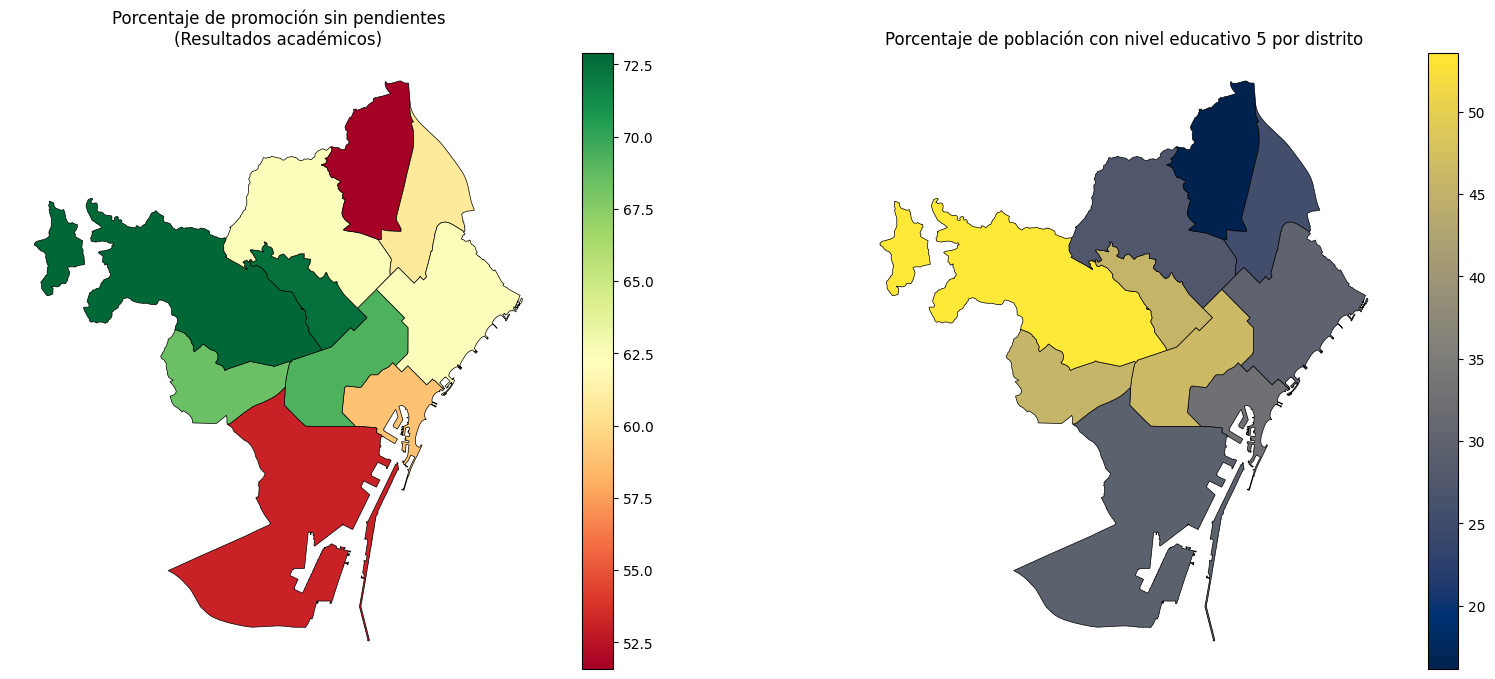

In [79]:
import matplotlib.colors as mcolors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Mapa 1: Resultados académicos
gdf_publicos.plot(column='porcentaje', 
                  ax=ax1, 
                  legend=True,
                  cmap='RdYlGn',
                  edgecolor='black',
                  linewidth=0.5)
ax1.set_title('Porcentaje de promoción sin pendientes\n(Resultados académicos)')
ax1.axis('off')



nivel = 5  # por ejemplo, nivel 1
df_nivel = df_geo_edu[df_geo_edu['NIV_EDUCA_esta'] == nivel]

colorblind_cmap = mcolors.ListedColormap(sns.color_palette("colorblind"))

df_nivel.plot(column='Porcentaje', 
              ax=ax2, 
              legend=True,
              cmap='cividis',
              edgecolor='black',
              linewidth=0.5)
ax2.set_title(f'Porcentaje de población con nivel educativo {nivel} por distrito')
ax2.axis('off')
plt.show()




In [60]:
# Crear tabla resumen ordenada por resultados
resumen = metricas_distritos[['Nom_Districte', 'porcentaje_promocion', 
                             'NIV_EDUCA_esta', 'Porcentaje_ajustado']].round(1)
resumen.columns = ['Distrito', '% Promoción', 'Nivel Pred (2-5)', '% Nivel Pred']
resumen['Ranking'] = range(1, len(resumen) + 1)

print("Ranking de distritos por resultados académicos (Niveles educativos 2-5):")
print(resumen.to_string(index=False))

# Estadísticas descriptivas
print("\n" + "="*50)
print("Resumen estadístico - Niveles 2-5:")
print(f"Nivel educativo predominante más frecuente: {metricas_distritos['NIV_EDUCA_esta'].mode().values[0]}")
print(f"Rango de niveles predominantes: {metricas_distritos['NIV_EDUCA_esta'].min()} - {metricas_distritos['NIV_EDUCA_esta'].max()}")

Ranking de distritos por resultados académicos (Niveles educativos 2-5):
           Distrito  % Promoción  Nivel Pred (2-5)  % Nivel Pred  Ranking
Sarrià-Sant Gervasi         72.9                 5          54.7        1
             Gràcia         72.5                 5          46.4        2
           Eixample         69.3                 5          47.1        3
          Les Corts         68.4                 5          46.6        4
     Horta-Guinardó         62.5                 5          28.5        5
         Sant Martí         62.4                 5          30.9        6
        Sant Andreu         60.8                 5          28.1        7
       Ciutat Vella         58.9                 5          33.2        8
     Sants-Montjuïc         53.1                 5          30.3        9
         Nou Barris         51.6                 5          32.5       10

Resumen estadístico - Niveles 2-5:
Nivel educativo predominante más frecuente: 5
Rango de niveles predominantes:

In [61]:
# Calcular coeficiente de correlación
correlacion = metricas_distritos['porcentaje_promocion'].corr(metricas_distritos['NIV_EDUCA_esta'])
correlacion_porcentaje = metricas_distritos['porcentaje_promocion'].corr(metricas_distritos['Porcentaje_ajustado'])

print(f"\nCorrelaciones (Niveles 2-5):")
print(f"Correlación resultados vs nivel predominante: {correlacion:.3f}")
print(f"Correlación resultados vs % nivel predominante: {correlacion_porcentaje:.3f}")

# Interpretación
if abs(correlacion) > 0.7:
    fuerza = "fuerte"
elif abs(correlacion) > 0.5:
    fuerza = "moderada"
elif abs(correlacion) > 0.3:
    fuerza = "débil"
else:
    fuerza = "muy débil o nula"

print(f"Interpretación: {fuerza} correlación entre nivel educativo y resultados académicos")


Correlaciones (Niveles 2-5):
Correlación resultados vs nivel predominante: nan
Correlación resultados vs % nivel predominante: 0.818
Interpretación: muy débil o nula correlación entre nivel educativo y resultados académicos


c:\Users\anica\anaconda3\envs\environment\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning:

invalid value encountered in divide

c:\Users\anica\anaconda3\envs\environment\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning:

invalid value encountered in divide



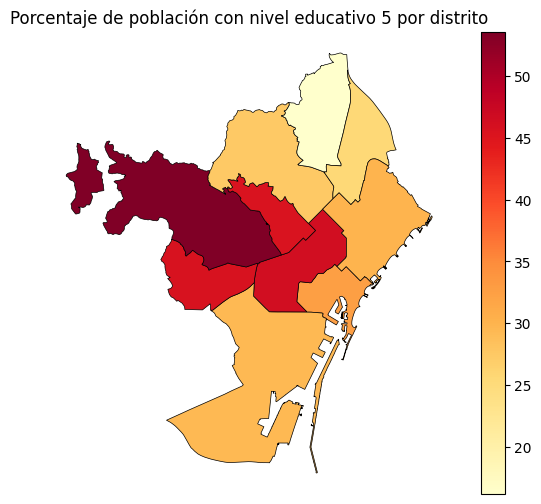

In [43]:


# Filtrar para un nivel educativo específico
nivel = 5  # por ejemplo, nivel 1
df_nivel = df_geo_edu[df_geo_edu['NIV_EDUCA_esta'] == nivel]

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
df_nivel.plot(column='Porcentaje', 
              ax=ax, 
              legend=True,
              cmap='YlOrRd',
              edgecolor='black',
              linewidth=0.5)
ax.set_title(f'Porcentaje de población con nivel educativo {nivel} por distrito')
ax.axis('off')
plt.show()

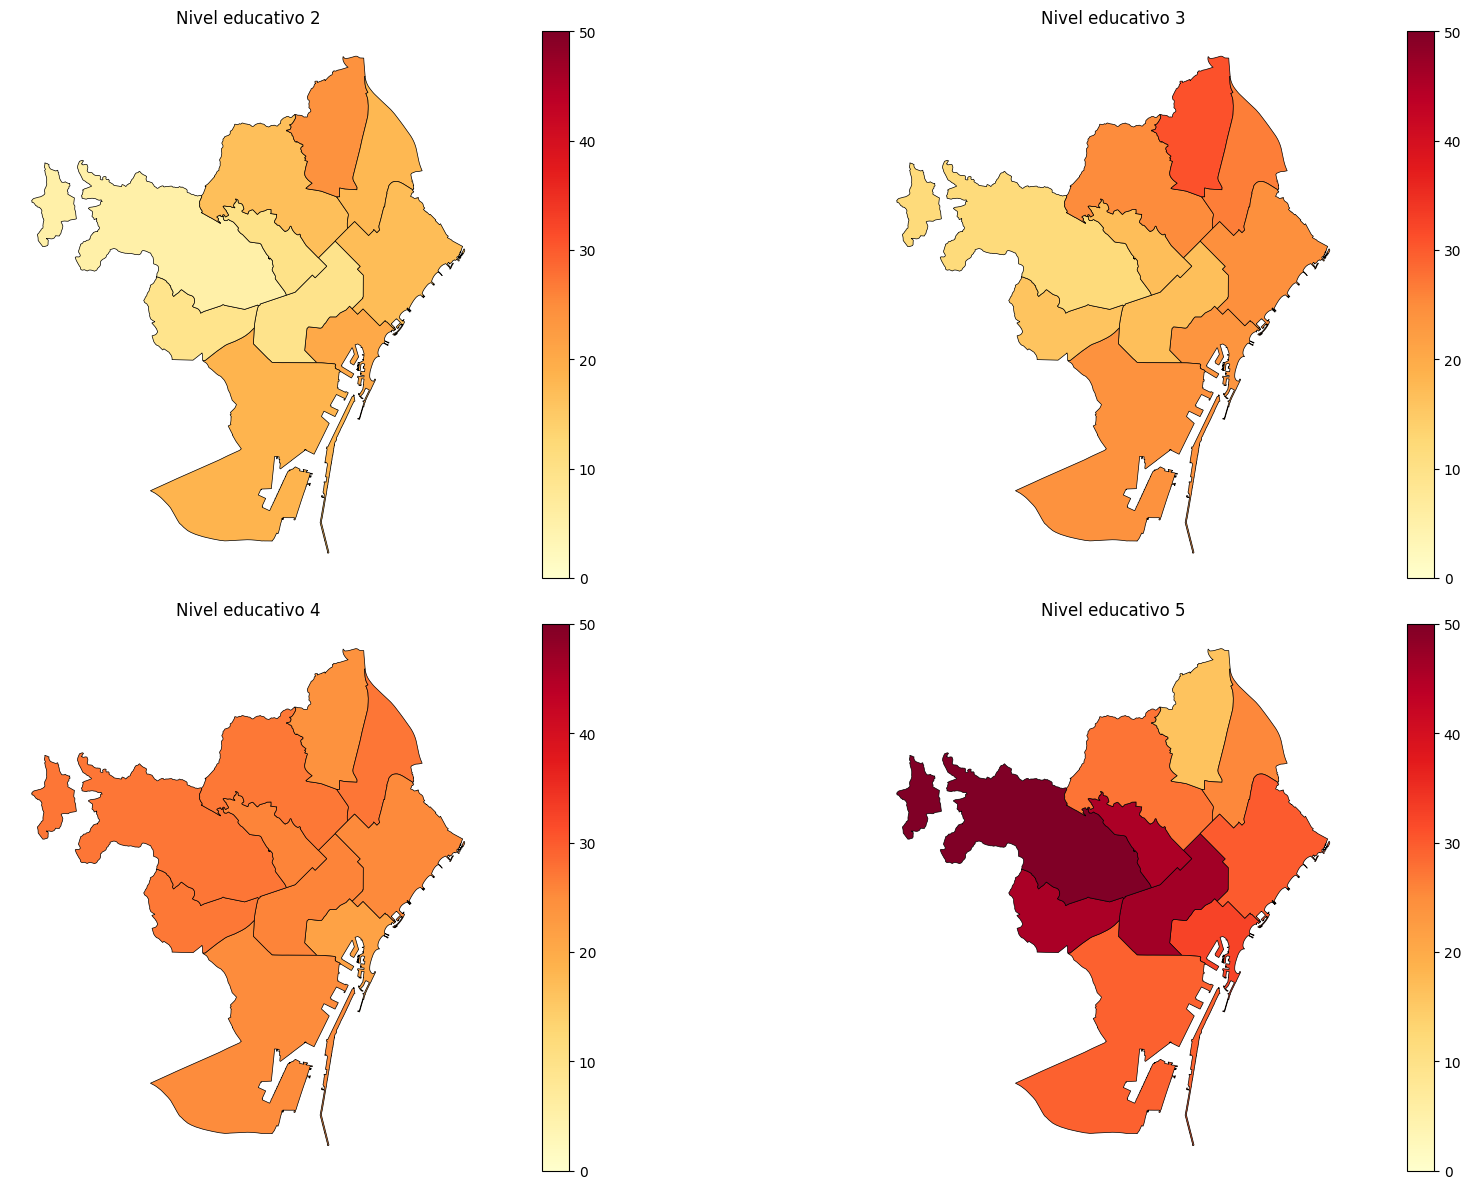

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()

for i, nivel in enumerate(range(2, 6)):
    df_nivel = df_geo_edu[df_geo_edu['NIV_EDUCA_esta'] == nivel]
    df_nivel.plot(column='Porcentaje', 
                  ax=axes[i], 
                  legend=True,
                  cmap='YlOrRd',
                  edgecolor='black',
                  vmax=50,
                  vmin=0,
                  linewidth=0.5)
    axes[i].set_title(f'Nivel educativo {nivel}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

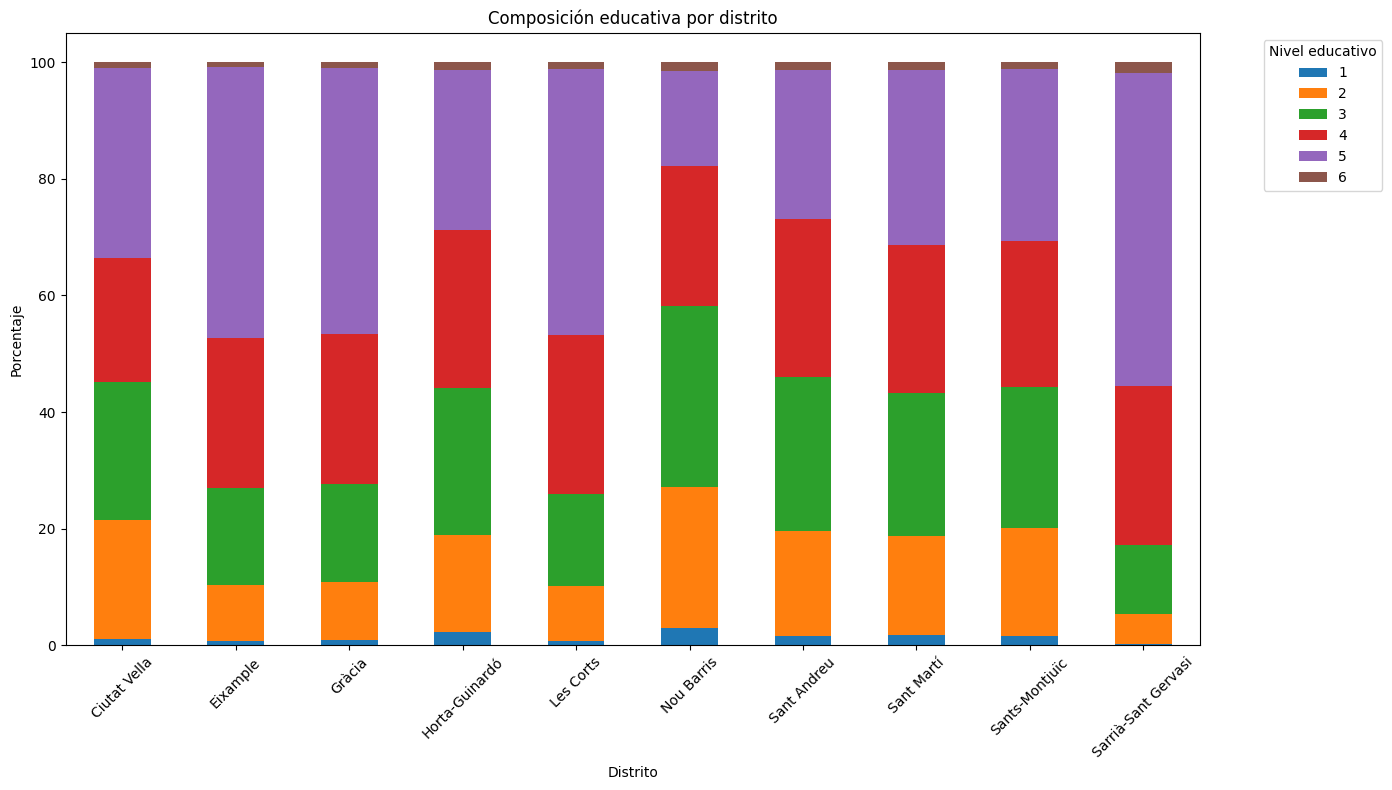

In [32]:
# Pivot table para tener niveles como columnas
pivot_df = df_nivels.pivot_table(index='Nom_Districte', 
                                columns='NIV_EDUCA_esta', 
                                values='Porcentaje')

plt.figure(figsize=(14, 8))
pivot_df.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Composición educativa por distrito')
plt.ylabel('Porcentaje')
plt.xlabel('Distrito')
plt.legend(title='Nivel educativo', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

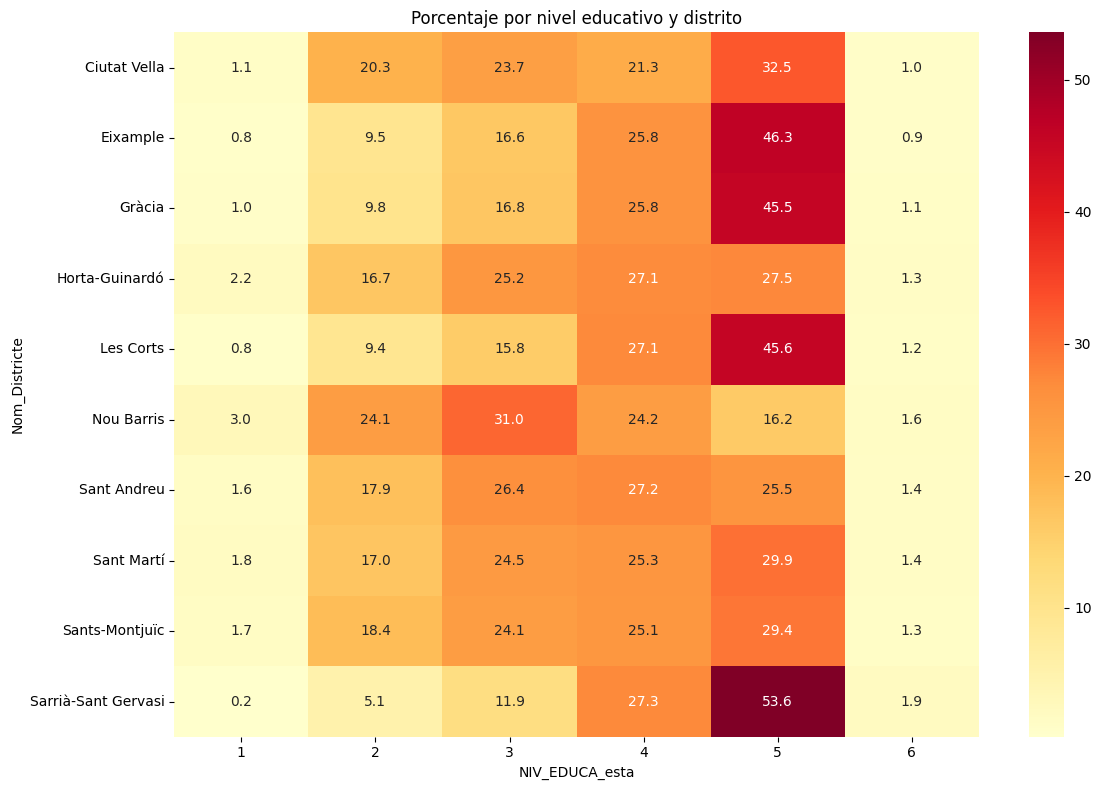

In [33]:
import seaborn as sns

plt.figure(figsize=(12, 8))
pivot_data = df_nivels.pivot_table(index='Nom_Districte', 
                                  columns='NIV_EDUCA_esta', 
                                  values='Porcentaje')
sns.heatmap(pivot_data, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Porcentaje por nivel educativo y distrito')
plt.tight_layout()
plt.show()

In [42]:
import plotly.express as px

# Gráfico interactivo de barras
fig = px.bar(df_nivels, 
             x='Nom_Districte', 
             y='Porcentaje', 
             color='NIV_EDUCA_esta',
             title='Distribución educativa por distrito',
             labels={'NIV_EDUCA_esta': 'Nivel educativo'})
fig.show()

In [34]:
import folium

# Centro de Barcelona
m = folium.Map(location=[41.3851, 2.1734], zoom_start=11)

# Añadir capa coroplética para un nivel
nivel_interes = 3
df_nivel = df_geo_edu[df_geo_edu['NIV_EDUCA_esta'] == nivel_interes]

folium.Choropleth(
    geo_data=df_nivel,
    data=df_nivel,
    columns=['Codi_Districte', 'Porcentaje'],
    key_on='feature.properties.Codi_Districte',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=f'Porcentaje nivel {nivel_interes}',
    highlight=True
).add_to(m)

# Añadir tooltips
folium.features.GeoJson(
    df_nivel,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['Nom_Districte', 'Porcentaje'],
        aliases=['Distrito:', 'Porcentaje:'],
        localize=True
    )
).add_to(m)

m

In [41]:
import folium

# Crear mapa
m = folium.Map(location=[41.3851, 2.1734], zoom_start=11)

# Datos para un nivel
nivel_interes = 1
df_nivel = df_geo_edu[df_geo_edu['NIV_EDUCA_esta'] == nivel_interes].copy()

# Asegurarse de que los datos son numéricos
df_nivel['Porcentaje'] = pd.to_numeric(df_nivel['Porcentaje'], errors='coerce')

# Capa coroplética
folium.Choropleth(
    geo_data=df_nivel.__geo_interface__,
    data=df_nivel,
    columns=['Codi_Districte', 'Porcentaje'],
    key_on='feature.properties.Codi_Districte',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=f'Porcentaje nivel {nivel_interes} (%)',
    nan_fill_color='white'
).add_to(m)

# Tooltips
for idx, row in df_nivel.iterrows():
    folium.GeoJson(
        row.geometry,
        tooltip=folium.Tooltip(
            f"<b>{row['Nom_Districte']}</b><br>"
            f"Porcentaje: {row['Porcentaje']:.1f}%"
        )
    ).add_to(m)

# Guardar como HTML
m.save('mapa_educacion_barcelona.html')
print("Mapa guardado como 'mapa_educacion_barcelona.html' - Ábrelo en tu navegador")

Mapa guardado como 'mapa_educacion_barcelona.html' - Ábrelo en tu navegador
